# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import re
from wordcloud import WordCloud
from textblob import TextBlob
from scipy.stats import chi2_contingency
import geopandas as gpd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Political Violence Data: recent data for various incidents in Nigeria

# Load The DataSet

In [2]:
df_political = pd.read_csv("C:/Users/parjita/Desktop/UNDP/Nigeria ACLED Export.csv")
df_political

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Admin3,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,...,ACLED Geo Precision,ACLED Geometrry,Acled Gwno,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude,Acled Pk,TimeFK Event Date
0,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Abia,Umuahia North,NaN,NaN,NaN,12/12/2022 3:33,NIG28349,...,1,Point,NaN,1,1,11,5.5263,7.4896,4083963,20221015
1,Military Forces of Nigeria (2015-),State Security Forces,Military Forces of Nigeria (2015-),Imo,Oguta,NaN,NaN,NaN,12/6/2022 15:53,NIG28909,...,1,Point,NaN,1,1,11,5.6333,6.8666,4068208,20221128
2,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Lagos,Amowo-Odofin,NaN,NaN,NaN,12/13/2022 9:05,NIG29012,...,1,Point,NaN,1,1,11,6.4437,3.2522,4091266,20221203
3,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Ogun,Shagamu,NaN,NaN,NaN,2/21/2023 9:05,NIG29996,...,1,Point,NaN,1,1,11,6.6955,3.5117,4169404,20230215
4,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Kebbi,Birnin-Kebbi,NaN,NaN,NaN,12/12/2022 3:33,NIG28350,...,1,Point,NaN,1,1,11,12.4539,4.1975,4080329,20221001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Niger Communal Militia (Nigeria),Communal militias,Civilians (Nigeria),Niger,Lapai,NaN,NaN,Farmers (Nigeria),10/18/2022 6:45,NIG26595,...,2,Point,0.0,4,7,47,8.7982,6.6755,4039627,20221007
1898,Military Forces of Nigeria (2015-),State Security Forces,Unidentified Armed Group (Nigeria),Nassarawa,Awe,NaN,NaN,NaN,10/12/2022 6:47,NIG26515,...,2,Point,0.0,1,3,13,8.1000,9.1333,4037384,20221006
1899,Military Forces of Nigeria (2015-),State Security Forces,Benue Communal Militia (Nigeria),Benue,Ukum,NaN,NaN,NaN,10/12/2022 6:47,NIG26513,...,2,Point,0.0,1,4,14,7.5167,9.6167,4037382,20221006
1900,Unidentified Armed Group (Nigeria),Armed Bandits,Civilians (Nigeria),Kano,Bebeji,NaN,NaN,NaN,10/18/2022 6:45,NIG26668,...,2,Point,0.0,3,7,37,11.6781,8.2534,4039891,20221008


# Cheking Shape of Dataset

In [3]:
df_political.shape 

(1902, 33)

# Checking data types of Column

In [4]:
df_political.dtypes

ACLED Actor1                object
ACLED Actor1 (group)        object
ACLED Actor2                object
ACLED Admin1                object
ACLED Admin2                object
ACLED Admin3               float64
ACLED Ally Actor1           object
ACLED Ally Actor2           object
ACLED CreatedOn             object
ACLED Event ID Cnty         object
ACLED Event ID No Cnty       int64
ACLED Event SubType         object
ACLED Event SubTypeDesc     object
ACLED Event Type            object
ACLED Event TypeDesc        object
ACLED Location              object
ACLED Notes                 object
ACLED Region                object
ACLED Source                object
ACLED SourceScale           object
ACLED Year                   int64
Geographic Area             object
ACLED Fatalities             int64
ACLED Geo Precision          int64
ACLED Geometrry             object
Acled Gwno                 float64
ACLED Inter1                 int64
ACLED Inter2                 int64
ACLED Interaction   

# Checking For Null Values

In [5]:
df_political.isnull().sum()

ACLED Actor1                  0
ACLED Actor1 (group)          0
ACLED Actor2                301
ACLED Admin1                  0
ACLED Admin2                  0
ACLED Admin3               1902
ACLED Ally Actor1          1472
ACLED Ally Actor2          1262
ACLED CreatedOn               0
ACLED Event ID Cnty           0
ACLED Event ID No Cnty        0
ACLED Event SubType           0
ACLED Event SubTypeDesc       0
ACLED Event Type              0
ACLED Event TypeDesc          0
ACLED Location                0
ACLED Notes                   0
ACLED Region                  0
ACLED Source                  0
ACLED SourceScale             0
ACLED Year                    0
Geographic Area               0
ACLED Fatalities              0
ACLED Geo Precision           0
ACLED Geometrry               0
Acled Gwno                 1772
ACLED Inter1                  0
ACLED Inter2                  0
ACLED Interaction             0
ACLED Latitude                0
ACLED Longitude               0
Acled Pk

# Dropping the column

In [6]:
#ACLED Admin3 not having any values so dropping that column
df_political = df_political.drop('ACLED Admin3', axis=1)

# Handaling The Missing Values

In [7]:
#Acled Gwno having numerical data so replace missing values with mean
df_political['Acled Gwno'] = df_political['Acled Gwno'].fillna(df_political['Acled Gwno'].mean())

In [8]:
#Acled Actor2,Ally Actor1 and Ally Actor2 having categorical data so replace missing values with mode
df_political['ACLED Actor2'] = df_political['ACLED Actor2'].fillna(df_political['ACLED Actor2'].mode().iloc[0])
df_political['ACLED Ally Actor1'] = df_political['ACLED Ally Actor1'].fillna(df_political['ACLED Ally Actor1'].mode().iloc[0])
df_political['ACLED Ally Actor2'] = df_political['ACLED Ally Actor2'].fillna(df_political['ACLED Ally Actor2'].mode().iloc[0])

# Checking Again For Null Values After Handalling Missing Values

In [9]:
df_political.isnull().sum()

ACLED Actor1               0
ACLED Actor1 (group)       0
ACLED Actor2               0
ACLED Admin1               0
ACLED Admin2               0
ACLED Ally Actor1          0
ACLED Ally Actor2          0
ACLED CreatedOn            0
ACLED Event ID Cnty        0
ACLED Event ID No Cnty     0
ACLED Event SubType        0
ACLED Event SubTypeDesc    0
ACLED Event Type           0
ACLED Event TypeDesc       0
ACLED Location             0
ACLED Notes                0
ACLED Region               0
ACLED Source               0
ACLED SourceScale          0
ACLED Year                 0
Geographic Area            0
ACLED Fatalities           0
ACLED Geo Precision        0
ACLED Geometrry            0
Acled Gwno                 0
ACLED Inter1               0
ACLED Inter2               0
ACLED Interaction          0
ACLED Latitude             0
ACLED Longitude            0
Acled Pk                   0
TimeFK Event Date          0
dtype: int64

# Check For The Duplicates

In [10]:
duplicates = df_political.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1897    False
1898    False
1899    False
1900    False
1901    False
Length: 1902, dtype: bool

# Diffrentiate Date,Time and Month From ACLED CreatedOn Column

In [11]:
df_political['ACLED CreatedOn'] = pd.to_datetime(df_political['ACLED CreatedOn'])

In [12]:
df_political['ACLED Date'] = df_political['ACLED CreatedOn'].dt.date
df_political['ACLED Time'] = df_political['ACLED CreatedOn'].dt.time
df_political['ACLED Month'] = df_political['ACLED CreatedOn'].dt.month

In [13]:
df_political.head()

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,ACLED Event ID No Cnty,...,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude,Acled Pk,TimeFK Event Date,ACLED Date,ACLED Time,ACLED Month
0,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Abia,Umuahia North,Pastoralists (Nigeria),Labour Group (Nigeria),2022-12-12 03:33:00,NIG28349,28349,...,1,1,11,5.5263,7.4896,4083963,20221015,2022-12-12,03:33:00,12
1,Military Forces of Nigeria (2015-),State Security Forces,Military Forces of Nigeria (2015-),Imo,Oguta,Pastoralists (Nigeria),Labour Group (Nigeria),2022-12-06 15:53:00,NIG28909,28909,...,1,1,11,5.6333,6.8666,4068208,20221128,2022-12-06,15:53:00,12
2,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Lagos,Amowo-Odofin,Pastoralists (Nigeria),Labour Group (Nigeria),2022-12-13 09:05:00,NIG29012,29012,...,1,1,11,6.4437,3.2522,4091266,20221203,2022-12-13,09:05:00,12
3,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Ogun,Shagamu,Pastoralists (Nigeria),Labour Group (Nigeria),2023-02-21 09:05:00,NIG29996,29996,...,1,1,11,6.6955,3.5117,4169404,20230215,2023-02-21,09:05:00,2
4,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Kebbi,Birnin-Kebbi,Pastoralists (Nigeria),Labour Group (Nigeria),2022-12-12 03:33:00,NIG28350,28350,...,1,1,11,12.4539,4.1975,4080329,20221001,2022-12-12,03:33:00,12


# Convert Float Data Types to Int

In [14]:
df_political['Acled Gwno'] = df_political['Acled Gwno'].astype(int)
df_political['ACLED Latitude'] = df_political['ACLED Latitude'].astype(int)
df_political['ACLED Longitude'] = df_political['ACLED Longitude'].astype(int)

# Checking for Unique Values in Columns

In [15]:
df_political.nunique(axis=0) 

ACLED Actor1                 80
ACLED Actor1 (group)         23
ACLED Actor2                 76
ACLED Admin1                 37
ACLED Admin2                436
ACLED Ally Actor1           128
ACLED Ally Actor2           193
ACLED CreatedOn              15
ACLED Event ID Cnty        1902
ACLED Event ID No Cnty     1902
ACLED Event SubType          20
ACLED Event SubTypeDesc      20
ACLED Event Type              6
ACLED Event TypeDesc          6
ACLED Location              908
ACLED Notes                1902
ACLED Region                  1
ACLED Source                372
ACLED SourceScale            13
ACLED Year                    2
Geographic Area               4
ACLED Fatalities             40
ACLED Geo Precision           3
ACLED Geometrry               1
Acled Gwno                    1
ACLED Inter1                  8
ACLED Inter2                  8
ACLED Interaction            34
ACLED Latitude               10
ACLED Longitude              13
Acled Pk                   1902
TimeFK E

# Dropping Column Which Is Having only 1 Unique Value

In [16]:
df_political = df_political.drop(['ACLED Region', 'ACLED Geometrry', 'Acled Gwno'], axis=1)

# Calculate the Correlation Matrix And Drop Highly Correlated Columns

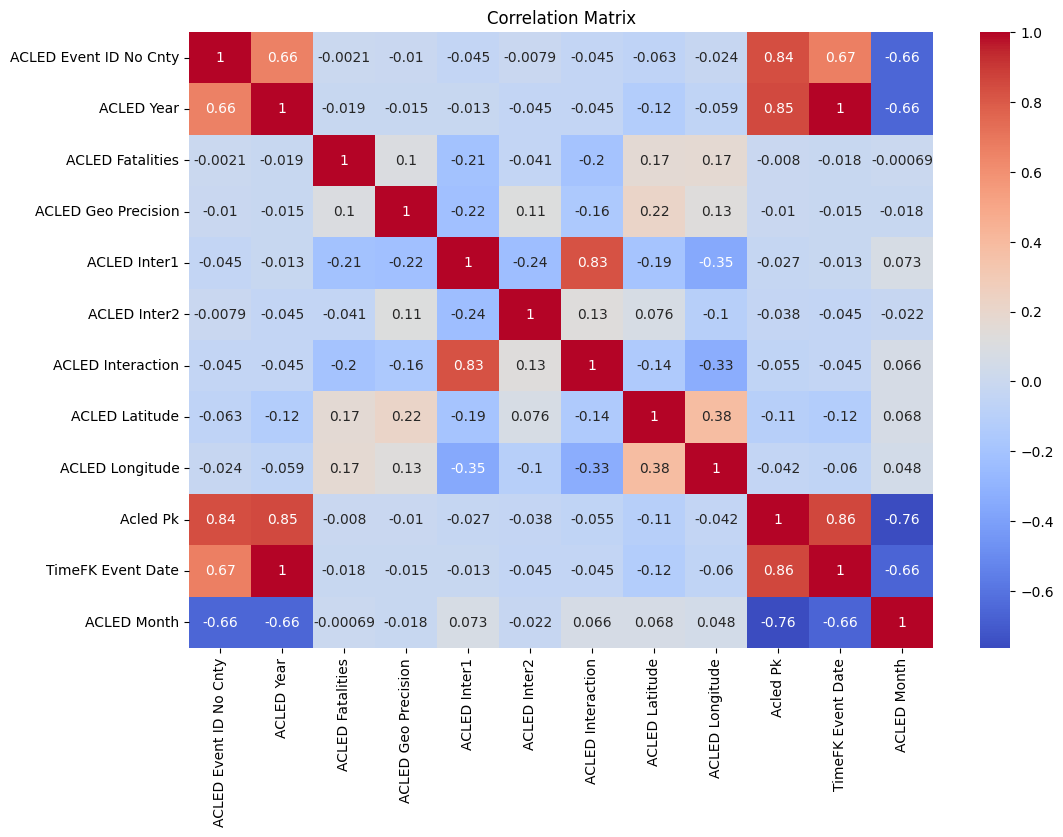

In [17]:
correlation_matrix = df_political.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
correlation_threshold = 0.8

highly_correlated_columns = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_columns.append(colname_i)

df_political_final = df_political.drop(columns=highly_correlated_columns)

print(f"Dropped Columns: {highly_correlated_columns}")


Dropped Columns: ['ACLED Interaction', 'Acled Pk', 'Acled Pk', 'TimeFK Event Date', 'TimeFK Event Date']


In [19]:
df_political_final.shape

(1902, 29)

# Convert To LowerCase and Correct the Incosistent Categories

In [20]:
categorical_cols = ['ACLED Actor1', 'ACLED Actor1 (group)', 'ACLED Actor2', 'ACLED Admin1', 'ACLED Admin2', 'ACLED Ally Actor1', 'ACLED Ally Actor2', 'ACLED Event ID Cnty', 'ACLED Event SubType', 'ACLED Event Type', 'ACLED Location', 'ACLED Notes', 'ACLED Source', 'ACLED SourceScale', 'Geographic Area']
df_political_final[categorical_cols] = df_political_final[categorical_cols].apply(lambda x: x.str.strip())

df_political_final[categorical_cols] = df_political_final[categorical_cols].apply(lambda x: x.str.lower())

df_political_final['ACLED Event Type'] = df_political_final['ACLED Event Type'].replace({'wrong_category': 'correct_category'})


# Final DataSet

In [21]:
df_political_final.head()

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,ACLED Event ID No Cnty,...,Geographic Area,ACLED Fatalities,ACLED Geo Precision,ACLED Inter1,ACLED Inter2,ACLED Latitude,ACLED Longitude,ACLED Date,ACLED Time,ACLED Month
0,police forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),abia,umuahia north,pastoralists (nigeria),labour group (nigeria),2022-12-12 03:33:00,nig28349,28349,...,south,1,1,1,1,5,7,2022-12-12,03:33:00,12
1,military forces of nigeria (2015-),state security forces,military forces of nigeria (2015-),imo,oguta,pastoralists (nigeria),labour group (nigeria),2022-12-06 15:53:00,nig28909,28909,...,south,0,1,1,1,5,6,2022-12-06,15:53:00,12
2,military forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),lagos,amowo-odofin,pastoralists (nigeria),labour group (nigeria),2022-12-13 09:05:00,nig29012,29012,...,south,1,1,1,1,6,3,2022-12-13,09:05:00,12
3,military forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),ogun,shagamu,pastoralists (nigeria),labour group (nigeria),2023-02-21 09:05:00,nig29996,29996,...,south,0,1,1,1,6,3,2023-02-21,09:05:00,2
4,police forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),kebbi,birnin-kebbi,pastoralists (nigeria),labour group (nigeria),2022-12-12 03:33:00,nig28350,28350,...,north west,1,1,1,1,12,4,2022-12-12,03:33:00,12


In [22]:
df_political_final['ACLED Date'] = pd.to_datetime(df_political_final['ACLED Date'])

# What is the violence profile in Nigeria in the given time period?  

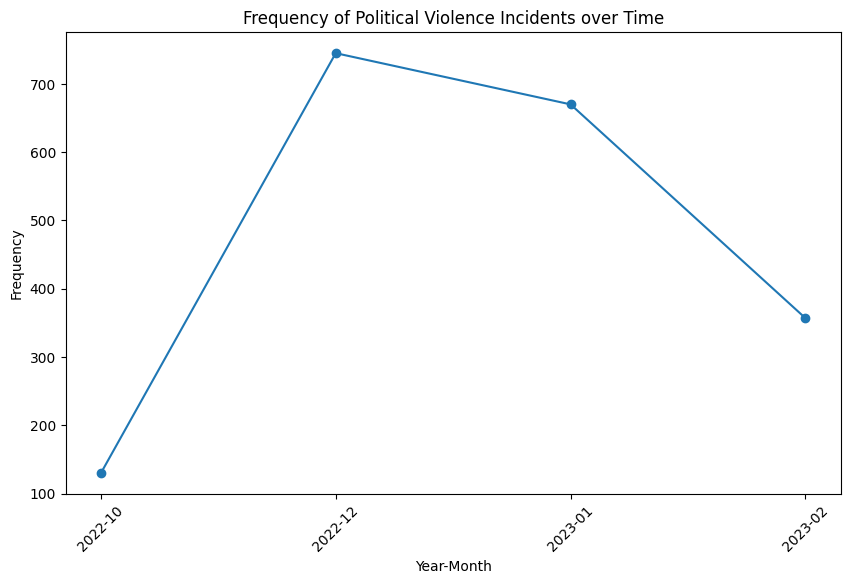

In [23]:
plt.figure(figsize=(10, 6))
df_political_final['YearMonth'] = df_political_final['ACLED Date'].dt.to_period('M')
violence_counts = df_political_final['YearMonth'].value_counts().sort_index()

x_labels = [str(year_month) for year_month in violence_counts.index]
plt.plot(x_labels, violence_counts.values, marker='o')

plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Frequency of Political Violence Incidents over Time')
plt.xticks(rotation=45)
plt.show()


# What are the most common Event Types of political violence?


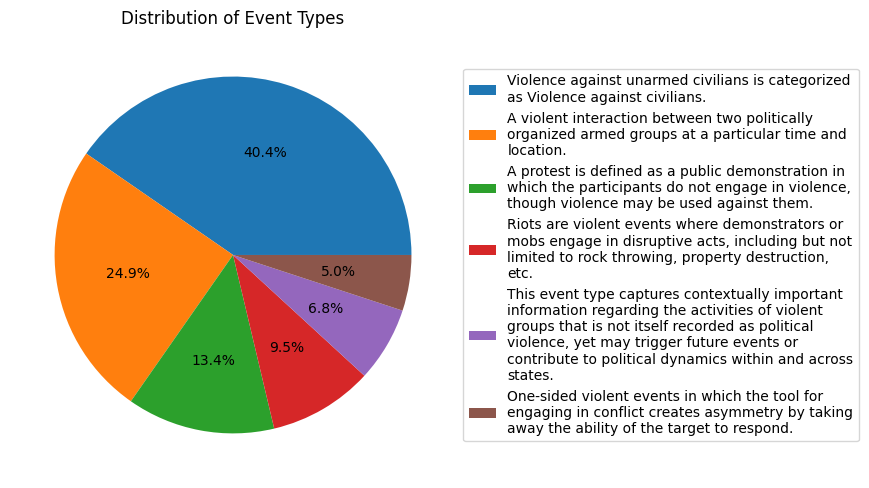

In [24]:
plt.figure(figsize=(8, 6)) 
event_type_counts = df_political_final['ACLED Event TypeDesc'].value_counts()

wrapped_labels = [textwrap.fill(label, 50) for label in event_type_counts.index]

patches = plt.pie(event_type_counts.values, labels=None, autopct='%1.1f%%')[0]

plt.legend(patches, wrapped_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Event Types')
plt.tight_layout()
plt.show()


# Which actors are the highest risk actors? (Fatality vs Number of Events)


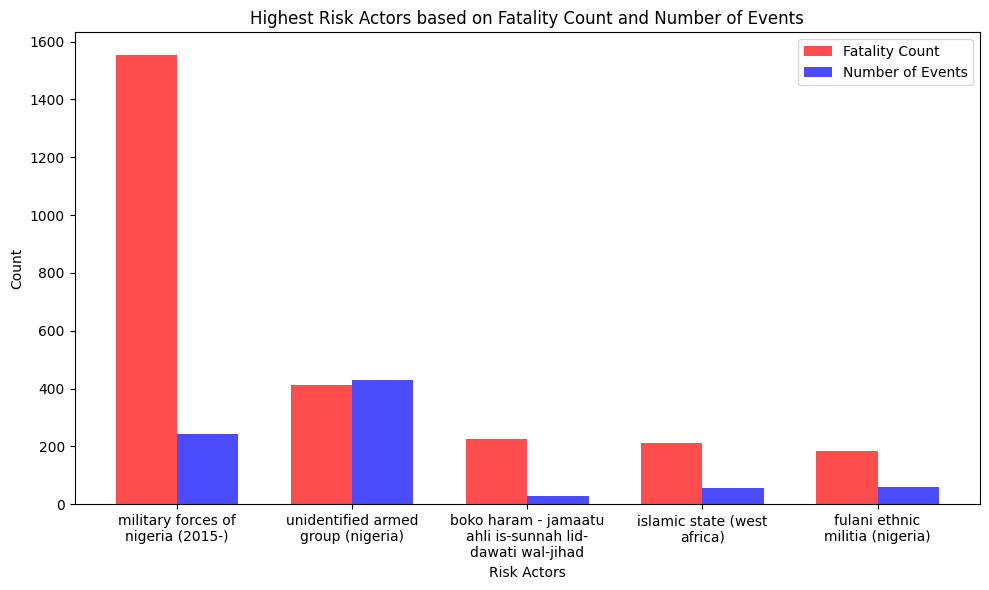

In [25]:
actor_stats = df_political_final.groupby('ACLED Actor1').agg({'ACLED Fatalities': 'sum', 'ACLED Event ID No Cnty': 'count'})
sorted_actors = actor_stats.sort_values(['ACLED Fatalities', 'ACLED Event ID No Cnty'], ascending=False)
highest_risk_actors = sorted_actors.head(5)


plt.figure(figsize=(10, 6))
bar_width = 0.35

index = np.arange(len(highest_risk_actors))
wrapped_labels = [textwrap.fill(label, 20) for label in highest_risk_actors.index]


plt.bar(index, highest_risk_actors['ACLED Fatalities'], bar_width, color='red', alpha=0.7, label='Fatality Count')
plt.bar(index + bar_width, highest_risk_actors['ACLED Event ID No Cnty'], bar_width, color='blue', alpha=0.7, label='Number of Events')

plt.xlabel('Risk Actors')
plt.ylabel('Count')
plt.title('Highest Risk Actors based on Fatality Count and Number of Events')
plt.xticks(index + bar_width/2, wrapped_labels, rotation=0, ha='center')
plt.legend()

plt.tight_layout()
plt.show()


# What is the geographic profile of the political violence?


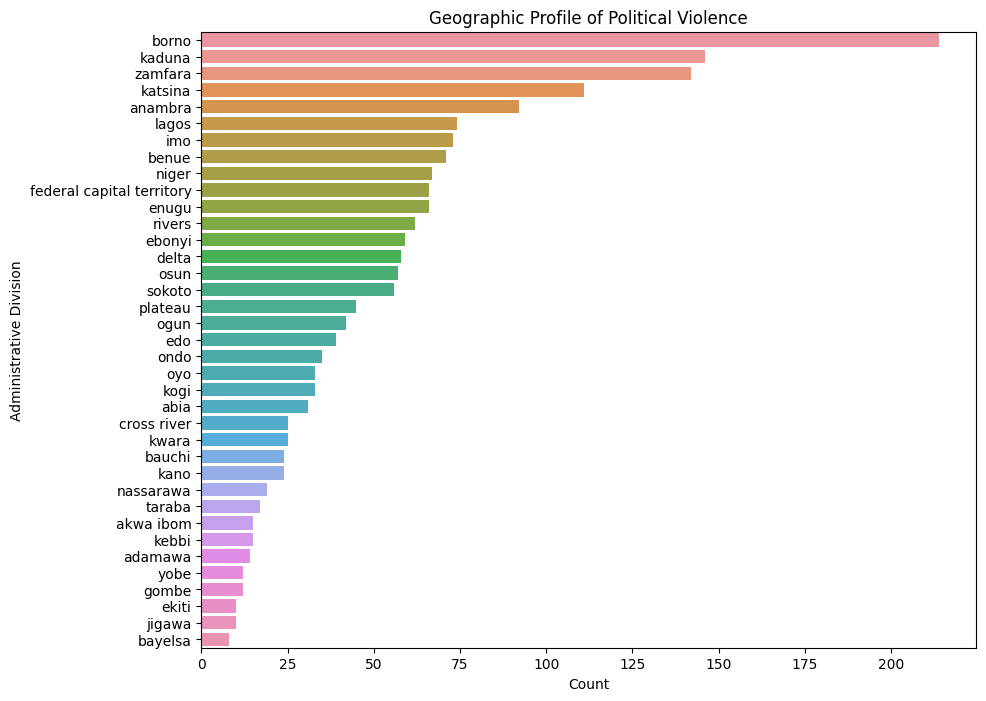

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_political_final, y='ACLED Admin1', order=df_political_final['ACLED Admin1'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Administrative Division')
plt.title('Geographic Profile of Political Violence')
plt.show()


# What features of this data set have the most associative or predictive value?

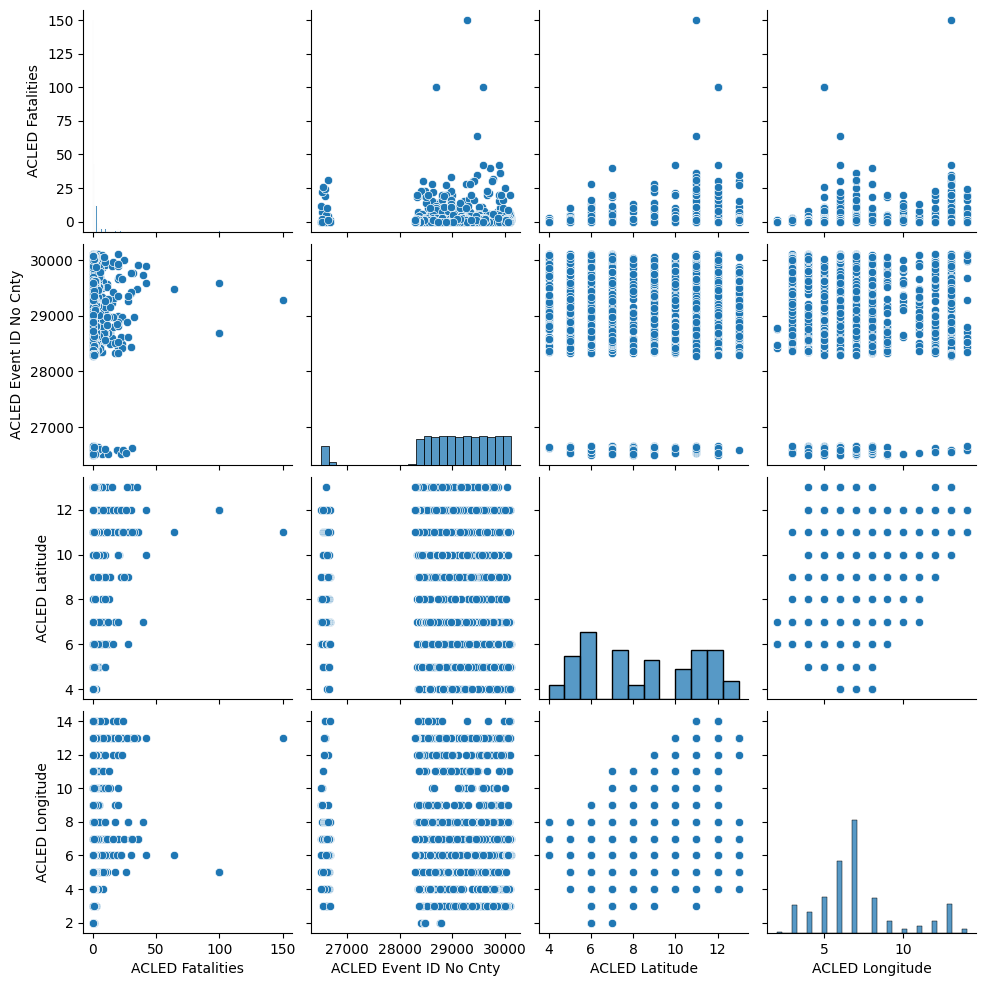

In [27]:
numerical_cols = ['ACLED Fatalities', 'ACLED Event ID No Cnty', 'ACLED Latitude', 'ACLED Longitude']
sns.pairplot(df_political_final[numerical_cols])
plt.show()

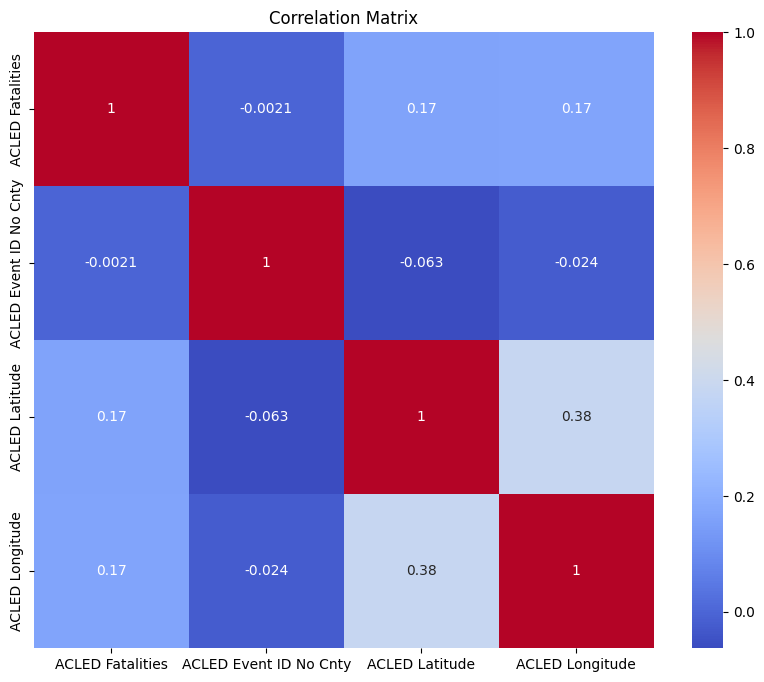

In [28]:
correlation_matrix = df_political_final[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# News Data: recent data for news in Nigeria

# Load The DataSet

In [29]:
df_news = pd.read_csv("C:/Users/parjita/Desktop/UNDP/Nigeria News EMM Export.csv")
df_news

,Newsfeed Country,Newsfeed Country UNDPRegion,Newsfeed CountryISO,Newsfeed DateDisplay,Newsfeed Description,Newsfeed Description2,Newsfeed Entity,Newsfeed IncidentType,Newsfeed Language,Newsfeed Link,Newsfeed Source,Newsfeed Source Description,Newsfeed Source Url,Newsfeed Source2,Newsfeed Trajectory,Date FK,Newsfeed Latitude,Newsfeed Longitude,Newsfeed PK
0,Nigeria,Africa,NGA,12/3/2022 8:54,Imo Police operatives repel attack on Orlu INE...,NaN,"Electoral Commission,Eastern Security Network,...",UNDP_Security,English,https://247ureports.com/2022/12/imo-police-ope...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,247ureports,NaN,20221203,5.79565,7.03513,908
1,Nigeria,Africa,NGA,12/3/2022 8:54,Defence Headquarters accuses Reuters of blackmail,NaN,"Maj.-Gen,Chibok School,Borno Government,Boko H...",UNDP_Security,English,https://247ureports.com/2022/12/defence-headqu...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,247ureports,NaN,20221203,9.05785,7.49508,909
2,Nigeria,Africa,NGA,12/3/2022 15:42,NRC To Resume Abuja-Kaduna Rail Operations On ...,NaN,"Fidet Okhiria,Boko Haram,Railway Corporation",UNDP_Conflict,English,https://www.africanexaminer.com/nrc-to-resume-...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,africanexaminer,NaN,20221203,10.52641,7.43879,910
3,Nigeria,Africa,NGA,12/3/2022 15:42,NRC To Resume Abuja-Kaduna Rail Operations On ...,NaN,"Fidet Okhiria,Boko Haram,Railway Corporation",UNDP_TerroristAttack,English,https://www.africanexaminer.com/nrc-to-resume-...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,africanexaminer,NaN,20221203,10.52641,7.43879,911
4,Nigeria,Africa,NGA,12/3/2022 17:02,Which diet is best for me? DailyMail.com weigh...,NaN,"University of Illinois, Chicago,Hannah Holsche...",UNDP_ScienceandTechnology,English,https://www.businesstelegraph.co.uk/which-diet...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,businesstelegraph,NaN,20221203,45.41117,-75.69812,912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,Nigeria,Africa,NGA,3/2/2023 16:19,"International Women’s Day: avoid distractions,...",NaN,"Labour Congress,Joe Ajaero",UNDP_Society,English,https://onlinenigeria.com/stories/72919-intern...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,onlinenigeria,NaN,20230302,11.31568,7.44957,119583
1572,Nigeria,Africa,NGA,3/2/2023 14:59,News Old School RuneScape – How to Start Playi...,NaN,NaN,UNDP_Conflict,English,https://onlinenigeria.com/stories/313443-old-s...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,onlinenigeria,NaN,20230302,-28.00029,153.43088,119584
1573,Nigeria,Africa,NGA,3/2/2023 13:04,Police arrest NNPP chieftain seen with a firea...,NaN,"Local Government Area,State Police,PREMIUM TIM...",UNDP_Conflict,English,https://www.premiumtimesng.com/regional/nwest/...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,premiumtimesng,NaN,20230302,12.00012,8.51672,119585
1574,Nigeria,Africa,NGA,3/2/2023 7:39,"36 Organizations Condemn Unlawful Arrest, Rape...",NaN,"Josephine Effah Chukwuma,Fame Foundation,Feder...",UNDP_Ecology,English,https://saharareporters.com/2019/04/30/36-orga...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,saharareporters,NaN,20230302,9.05785,7.49508,119586


# Cheking Shape of Dataset

In [30]:
df_news.shape 

(1576, 19)

# Checking data types of Column

In [31]:
df_news.dtypes

Newsfeed Country                object
Newsfeed Country UNDPRegion     object
Newsfeed CountryISO             object
Newsfeed DateDisplay            object
Newsfeed Description            object
Newsfeed Description2          float64
Newsfeed Entity                 object
Newsfeed IncidentType           object
Newsfeed Language               object
Newsfeed Link                   object
Newsfeed Source                 object
Newsfeed Source Description     object
Newsfeed Source Url             object
Newsfeed Source2                object
Newsfeed Trajectory            float64
Date FK                          int64
Newsfeed Latitude              float64
Newsfeed Longitude             float64
Newsfeed PK                      int64
dtype: object

# Checking For Null Values

In [32]:
df_news.isnull().sum()

Newsfeed Country                  0
Newsfeed Country UNDPRegion       0
Newsfeed CountryISO               0
Newsfeed DateDisplay              0
Newsfeed Description              0
Newsfeed Description2          1576
Newsfeed Entity                  71
Newsfeed IncidentType             0
Newsfeed Language                 0
Newsfeed Link                     0
Newsfeed Source                   0
Newsfeed Source Description       0
Newsfeed Source Url               0
Newsfeed Source2                  0
Newsfeed Trajectory            1576
Date FK                           0
Newsfeed Latitude                50
Newsfeed Longitude               50
Newsfeed PK                       0
dtype: int64

# Dropping the column

In [33]:
#Newsfeed Description2, Newsfeed Trajectory not having any values so dropping that column
df_news = df_news.drop(['Newsfeed Description2', 'Newsfeed Trajectory'], axis=1)

# Handaling The Missing Values

In [34]:
#Newsfeed Latitude,Newsfeed Longitude having numerical data so replace missing values with mean
df_news['Newsfeed Latitude'] = df_news['Newsfeed Latitude'].fillna(df_news['Newsfeed Latitude'].mean())
df_news['Newsfeed Longitude'] = df_news['Newsfeed Longitude'].fillna(df_news['Newsfeed Longitude'].mean())

In [35]:
#Newsfeed Entity having categorical data so replace missing values with mode
df_news['Newsfeed Entity'] = df_news['Newsfeed Entity'].fillna(df_news['Newsfeed Entity'].mode().iloc[0])

# Checking Again For Null Values After Handalling Missing Values

In [36]:
df_news.isnull().sum()

Newsfeed Country               0
Newsfeed Country UNDPRegion    0
Newsfeed CountryISO            0
Newsfeed DateDisplay           0
Newsfeed Description           0
Newsfeed Entity                0
Newsfeed IncidentType          0
Newsfeed Language              0
Newsfeed Link                  0
Newsfeed Source                0
Newsfeed Source Description    0
Newsfeed Source Url            0
Newsfeed Source2               0
Date FK                        0
Newsfeed Latitude              0
Newsfeed Longitude             0
Newsfeed PK                    0
dtype: int64

# Check For The Duplicates

In [37]:
duplicates = df_news.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1571    False
1572    False
1573    False
1574    False
1575    False
Length: 1576, dtype: bool

# Diffrentiate Date,Time,Year,Month From Newsfeed DateDisplay Column

In [38]:
df_news['Newsfeed DateDisplay'] = pd.to_datetime(df_news['Newsfeed DateDisplay'])

In [39]:
df_news['NewsFeed Date'] = df_news['Newsfeed DateDisplay'].dt.date
df_news['NewsFeed Time'] = df_news['Newsfeed DateDisplay'].dt.time
df_news['NewsFeed Year'] = df_news['Newsfeed DateDisplay'].dt.year
df_news['NewsFeed Month'] = df_news['Newsfeed DateDisplay'].dt.month

In [40]:
df_news.head()

,Newsfeed Country,Newsfeed Country UNDPRegion,Newsfeed CountryISO,Newsfeed DateDisplay,Newsfeed Description,Newsfeed Entity,Newsfeed IncidentType,Newsfeed Language,Newsfeed Link,Newsfeed Source,...,Newsfeed Source Url,Newsfeed Source2,Date FK,Newsfeed Latitude,Newsfeed Longitude,Newsfeed PK,NewsFeed Date,NewsFeed Time,NewsFeed Year,NewsFeed Month
0,Nigeria,Africa,NGA,2022-12-03 08:54:00,Imo Police operatives repel attack on Orlu INE...,"Electoral Commission,Eastern Security Network,...",UNDP_Security,English,https://247ureports.com/2022/12/imo-police-ope...,EMM,...,http://emm.newsbrief.eu/NewsBrief,247ureports,20221203,5.79565,7.03513,908,2022-12-03,08:54:00,2022,12
1,Nigeria,Africa,NGA,2022-12-03 08:54:00,Defence Headquarters accuses Reuters of blackmail,"Maj.-Gen,Chibok School,Borno Government,Boko H...",UNDP_Security,English,https://247ureports.com/2022/12/defence-headqu...,EMM,...,http://emm.newsbrief.eu/NewsBrief,247ureports,20221203,9.05785,7.49508,909,2022-12-03,08:54:00,2022,12
2,Nigeria,Africa,NGA,2022-12-03 15:42:00,NRC To Resume Abuja-Kaduna Rail Operations On ...,"Fidet Okhiria,Boko Haram,Railway Corporation",UNDP_Conflict,English,https://www.africanexaminer.com/nrc-to-resume-...,EMM,...,http://emm.newsbrief.eu/NewsBrief,africanexaminer,20221203,10.52641,7.43879,910,2022-12-03,15:42:00,2022,12
3,Nigeria,Africa,NGA,2022-12-03 15:42:00,NRC To Resume Abuja-Kaduna Rail Operations On ...,"Fidet Okhiria,Boko Haram,Railway Corporation",UNDP_TerroristAttack,English,https://www.africanexaminer.com/nrc-to-resume-...,EMM,...,http://emm.newsbrief.eu/NewsBrief,africanexaminer,20221203,10.52641,7.43879,911,2022-12-03,15:42:00,2022,12
4,Nigeria,Africa,NGA,2022-12-03 17:02:00,Which diet is best for me? DailyMail.com weigh...,"University of Illinois, Chicago,Hannah Holsche...",UNDP_ScienceandTechnology,English,https://www.businesstelegraph.co.uk/which-diet...,EMM,...,http://emm.newsbrief.eu/NewsBrief,businesstelegraph,20221203,45.41117,-75.69812,912,2022-12-03,17:02:00,2022,12


# Convert Float Data Types to Int

In [41]:
df_news['Newsfeed Latitude'] = df_news['Newsfeed Latitude'].astype(int)
df_news['Newsfeed Longitude'] = df_news['Newsfeed Longitude'].astype(int)

# Checking for Unique Values in Columns

In [42]:
df_news.nunique(axis=0) 

Newsfeed Country                  1
Newsfeed Country UNDPRegion       1
Newsfeed CountryISO               1
Newsfeed DateDisplay           1344
Newsfeed Description           1460
Newsfeed Entity                1326
Newsfeed IncidentType            12
Newsfeed Language                 1
Newsfeed Link                  1469
Newsfeed Source                   1
Newsfeed Source Description       1
Newsfeed Source Url               1
Newsfeed Source2                 34
Date FK                          90
Newsfeed Latitude                77
Newsfeed Longitude              117
Newsfeed PK                    1576
NewsFeed Date                    90
NewsFeed Time                   754
NewsFeed Year                     2
NewsFeed Month                    4
dtype: int64

# Dropping Column Which Is Having only 1 Unique Value

In [43]:
df_news_final = df_news.drop(['Newsfeed Country', 'Newsfeed Country UNDPRegion', 'Newsfeed CountryISO', 'Newsfeed Language', 'Newsfeed Source', 'Newsfeed Source Description', 'Newsfeed Source Url'], axis=1)

In [44]:
df_news_final.shape

(1576, 14)

In [45]:
df_news_final.dtypes

Newsfeed DateDisplay     datetime64[ns]
Newsfeed Description             object
Newsfeed Entity                  object
Newsfeed IncidentType            object
Newsfeed Link                    object
Newsfeed Source2                 object
Date FK                           int64
Newsfeed Latitude                 int32
Newsfeed Longitude                int32
Newsfeed PK                       int64
NewsFeed Date                    object
NewsFeed Time                    object
NewsFeed Year                     int64
NewsFeed Month                    int64
dtype: object

# Convert To LowerCase and Correct the Incosistent Categories

In [46]:
text_cols = ['Newsfeed Description', 'Newsfeed Entity', 'Newsfeed IncidentType', 'Newsfeed Link', 'Newsfeed Source2', 'NewsFeed Date', 'NewsFeed Time']

df_news_final[text_cols] = df_news_final[text_cols].astype(str)
df_news_final[text_cols] = df_news_final[text_cols].apply(lambda x: x.str.strip())
df_news_final[text_cols] = df_news_final[text_cols].apply(lambda x: x.str.lower())
df_news_final[text_cols] = df_news_final[text_cols].apply(lambda x: x.apply(lambda s: re.sub(r'[^a-zA-Z0-9\s]', '', s)))


# Final DataSet

In [47]:
df_news_final.head()

,Newsfeed DateDisplay,Newsfeed Description,Newsfeed Entity,Newsfeed IncidentType,Newsfeed Link,Newsfeed Source2,Date FK,Newsfeed Latitude,Newsfeed Longitude,Newsfeed PK,NewsFeed Date,NewsFeed Time,NewsFeed Year,NewsFeed Month
0,2022-12-03 08:54:00,imo police operatives repel attack on orlu ine...,electoral commissioneastern security networkmi...,undpsecurity,https247ureportscom202212imopoliceoperativesre...,247ureports,20221203,5,7,908,20221203,085400,2022,12
1,2022-12-03 08:54:00,defence headquarters accuses reuters of blackmail,majgenchibok schoolborno governmentboko haramr...,undpsecurity,https247ureportscom202212defenceheadquartersac...,247ureports,20221203,9,7,909,20221203,085400,2022,12
2,2022-12-03 15:42:00,nrc to resume abujakaduna rail operations on m...,fidet okhiriaboko haramrailway corporation,undpconflict,httpswwwafricanexaminercomnrctoresumeabujakadu...,africanexaminer,20221203,10,7,910,20221203,154200,2022,12
3,2022-12-03 15:42:00,nrc to resume abujakaduna rail operations on m...,fidet okhiriaboko haramrailway corporation,undpterroristattack,httpswwwafricanexaminercomnrctoresumeabujakadu...,africanexaminer,20221203,10,7,911,20221203,154200,2022,12
4,2022-12-03 17:02:00,which diet is best for me dailymailcom weighs ...,university of illinois chicagohannah holscherd...,undpscienceandtechnology,httpswwwbusinesstelegraphcoukwhichdietisbestfo...,businesstelegraph,20221203,45,-75,912,20221203,170200,2022,12


# What are the key news trends during the period attached?

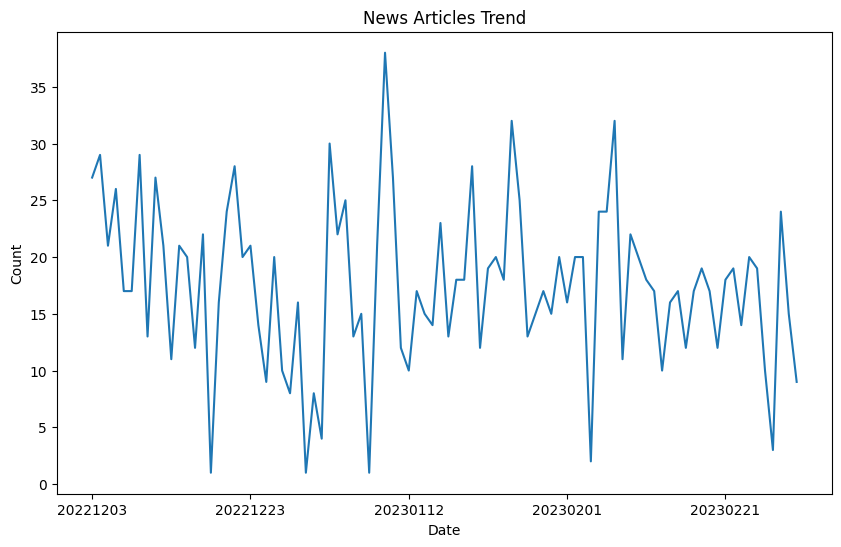

In [48]:
plt.figure(figsize=(10, 6))
df_news_final['NewsFeed Date'].value_counts().sort_index().plot(kind='line')
plt.title('News Articles Trend')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


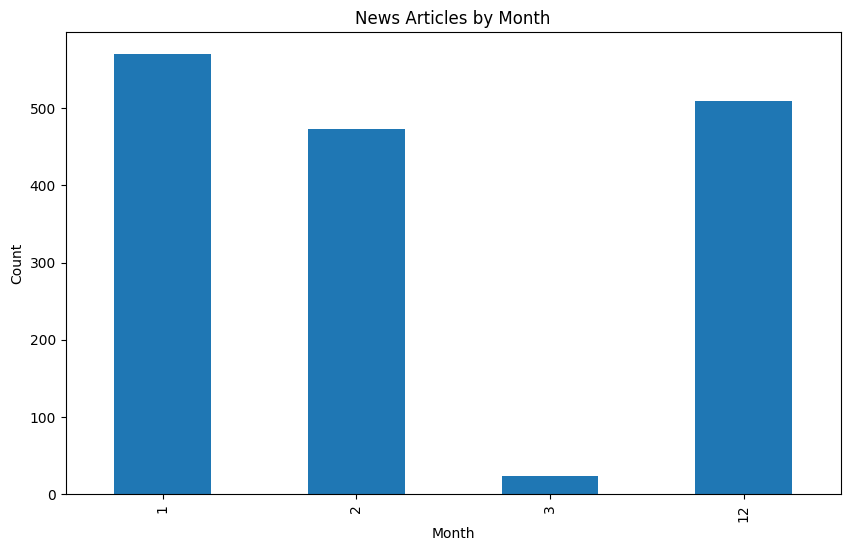

In [49]:
plt.figure(figsize=(10, 6))
df_news_final['NewsFeed Month'].value_counts().sort_index().plot(kind='bar')
plt.title('News Articles by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



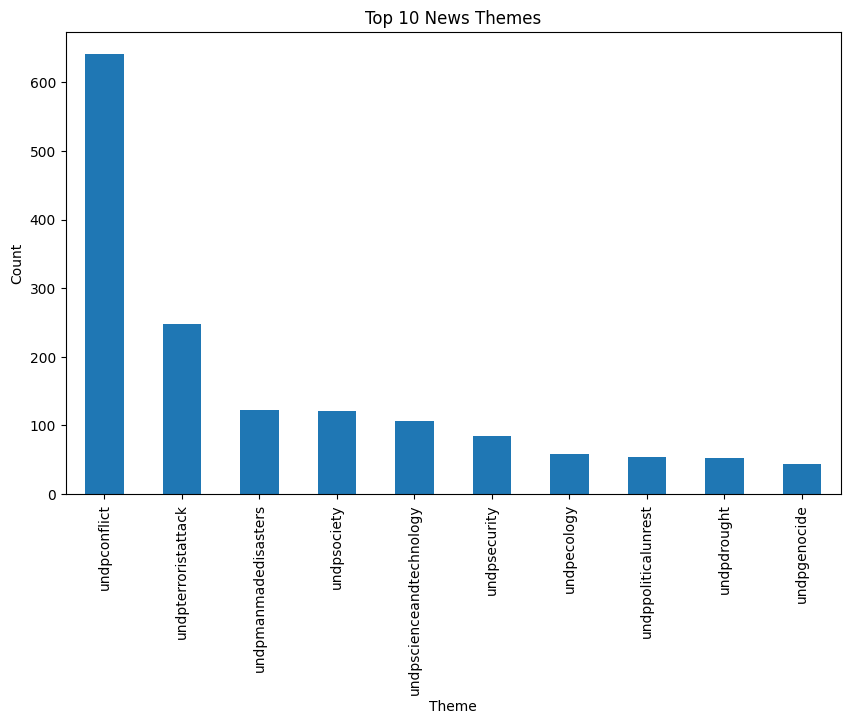

In [50]:
top_n_themes = df_news_final['Newsfeed IncidentType'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_n_themes.plot(kind='bar')
plt.title('Top 10 News Themes')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.show()

# What are the key trending themes?

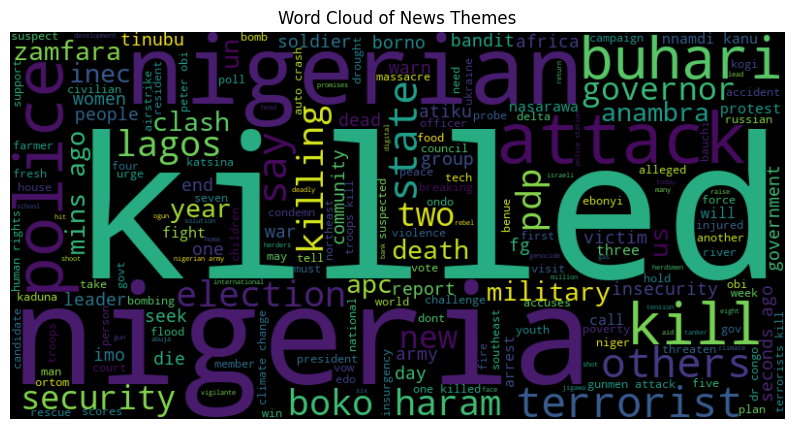

In [51]:
text = ' '.join(df_news_final['Newsfeed Description'].values)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Themes')
plt.show()



# Is there a key sentiment in the news?

In [52]:
df_news_final['Sentiment'] = df_news_final['Newsfeed Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

average_sentiment = df_news_final['Sentiment'].mean()
if average_sentiment > 0:
    key_sentiment = 'Positive'
elif average_sentiment < 0:
    key_sentiment = 'Negative'
else:
    key_sentiment = 'Neutral'

print(f"The key sentiment in the news is: {key_sentiment}")

The key sentiment in the news is: Negative


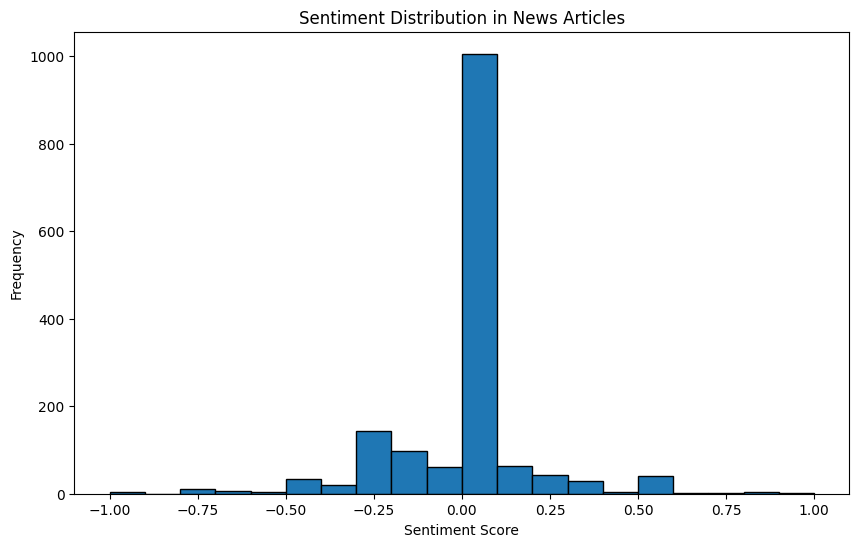

In [53]:
df_news_final['Sentiment'] = df_news_final['Newsfeed Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
plt.hist(df_news_final['Sentiment'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution in News Articles')
plt.show()


# Merged Two DataSets

In [54]:
merged_df = pd.merge(df_political_final, df_news_final, left_on='ACLED Year', right_on='NewsFeed Year')

In [55]:
merged_df.head()

,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,ACLED Event ID No Cnty,...,Newsfeed Source2,Date FK,Newsfeed Latitude,Newsfeed Longitude,Newsfeed PK,NewsFeed Date,NewsFeed Time,NewsFeed Year,NewsFeed Month,Sentiment
0,police forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),abia,umuahia north,pastoralists (nigeria),labour group (nigeria),2022-12-12 03:33:00,nig28349,28349,...,247ureports,20221203,5,7,908,20221203,085400,2022,12,0.00
1,police forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),abia,umuahia north,pastoralists (nigeria),labour group (nigeria),2022-12-12 03:33:00,nig28349,28349,...,247ureports,20221203,9,7,909,20221203,085400,2022,12,0.00
2,police forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),abia,umuahia north,pastoralists (nigeria),labour group (nigeria),2022-12-12 03:33:00,nig28349,28349,...,africanexaminer,20221203,10,7,910,20221203,154200,2022,12,0.00
3,police forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),abia,umuahia north,pastoralists (nigeria),labour group (nigeria),2022-12-12 03:33:00,nig28349,28349,...,africanexaminer,20221203,10,7,911,20221203,154200,2022,12,0.00
4,police forces of nigeria (2015-),state security forces,police forces of nigeria (2015-),abia,umuahia north,pastoralists (nigeria),labour group (nigeria),2022-12-12 03:33:00,nig28349,28349,...,businesstelegraph,20221203,45,-75,912,20221203,170200,2022,12,0.75


# Is there a correlation between political violence event types and the key news trending in the region?  

In [56]:
contingency_table = pd.crosstab(df_political_final['ACLED Event Type'], df_news_final['Newsfeed Description'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 7880.000000000001
p-value: 4.1251999926331865e-07


The chi-square statistic is calculated as 7880.000000000001, and the p-value is approximately 4.1251999926331865e-07.

The low p-value suggests that there is a strong correlation between the different categories of political violence event occurrences and the major regional news stories trending at the time. It follows that the occurrence of particular event categories is reliant on local news trends. The correlation shows that current political violence occurrences in the area may have an impact on or be connected to news patterns.

# Additional Analysis

# GeoDataFrame from the political violence data

C:\Users\parjita\AppData\Local\Temp\ipykernel_3580\405228154.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


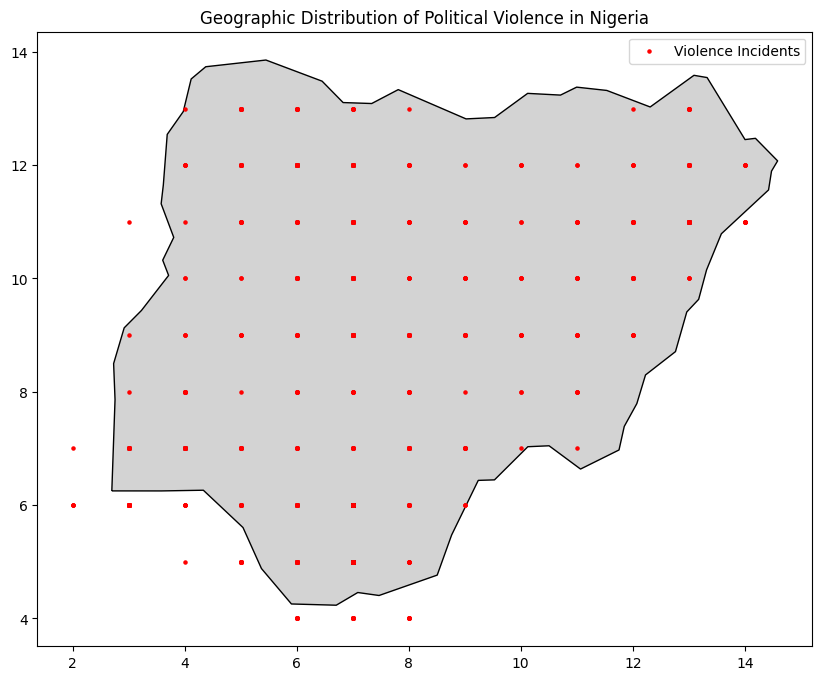

In [57]:
gdf_political_violence = gpd.GeoDataFrame(df_political_final, geometry=gpd.points_from_xy(df_political_final['ACLED Longitude'], df_political_final['ACLED Latitude']))

gdf_political_violence.crs = 'EPSG:4326'
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nigeria = world[world['name'] == 'Nigeria']


ax = nigeria.plot(color='lightgray', edgecolor='black', figsize=(10, 10))
gdf_political_violence.plot(ax=ax, markersize=5, color='red')
plt.title('Geographic Distribution of Political Violence in Nigeria')
plt.legend(['Violence Incidents'])
plt.show()


# Get the most important words for each topic

In [58]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_news_final['Newsfeed Description'])

num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f'Topic #{topic_idx+1}: {", ".join(top_words)}')


Topic #1: nigeria, climate, ago, change, insecurity, nigerias, mins, drought, governor, ondo
Topic #2: police, kill, killed, terrorists, attack, gunmen, buhari, death, troops, clash
Topic #3: 2023, lagos, die, election, women, condemns, accident, new, tech, violence
Topic #4: army, atiku, elections, insurgency, pdp, 2023, russian, campaign, nigerian, tinubu
Topic #5: nasarawa, nigerian, kogi, ukraine, human, war, killed, rights, military, explosion
